In [7]:
import keras
from keras.models import Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def getInceptionV3():
    # get the inception V3 model
    modelInceptionV3 = keras.applications.InceptionV3(weights='imagenet')

    # remove the last layer
    modelInceptionV3OutLayer = modelInceptionV3.layers[len(modelInceptionV3.layers)-2].name
    modelInceptionV3NN =  Model(inputs=modelInceptionV3.input, outputs=modelInceptionV3.get_layer(modelInceptionV3OutLayer).output) 
    return modelInceptionV3NN

In [9]:
def inference_over_image(path_to_image, modelInceptionV3NN, toPrint=False):
  img_raw = tf.io.read_file(path_to_image)
  img = tf.io.decode_image(img_raw)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, [299,299])
  img_to_show = img
  img = np.expand_dims(img, 0)
  if toPrint == True:
    _ = plt.imshow(img_to_show)
  return modelInceptionV3NN.predict(img)

In [10]:
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)
modelInceptionV3NN = getInceptionV3()

In [11]:
classes = np.loadtxt("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/data.csv", delimiter=',')

In [16]:
def get_class(value, maxval):
  if maxval < 0.65:
    return 'unk - acc: ' + str(maxval)
  if value in range(4):
    return 'a - acc: ' + str(maxval)
  if value in range(4, 8):
    return 'c - acc: ' + str(maxval)
  if value in range(8, 12):
    return 'g - acc: ' + str(maxval)
  if value in range(12, 16):
    return 'n - acc: ' + str(maxval)
  if value in range(16, 20):
    return 'p - acc: ' + str(maxval)

In [17]:
def inference(path_img):
  global classes
  global modelInceptionV3NN
  img_raw = tf.io.read_file(path_img)
  img = tf.io.decode_image(img_raw)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, [299,299])
  img_to_show = img
  img = np.expand_dims(img, 0)
  _ = plt.imshow(img_to_show)
  features = modelInceptionV3NN.predict(img)

  score = []

  for sample in classes:
    score.append(-1*cosine_loss(features, np.array([sample], dtype=np.float32)).numpy())
  print(get_class(score.index(max(score)), max(score)))

a - acc: 0.7803422212600708


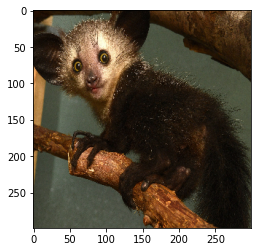

In [18]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/a1.jpg")

a - acc: 0.8860223889350891


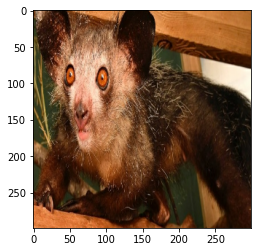

In [19]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/a2.jpg")

a - acc: 0.8420611619949341


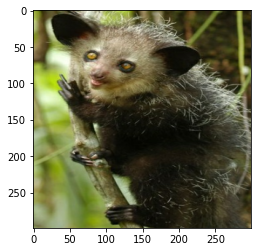

In [20]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/a3.jpg")

a - acc: 0.859864354133606


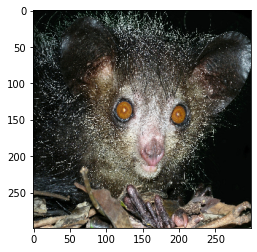

In [21]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/a4.jpg")

c - acc: 0.8349571228027344


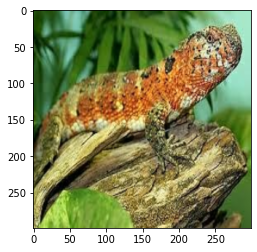

In [22]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/c1.jpg")

c - acc: 0.8496419191360474


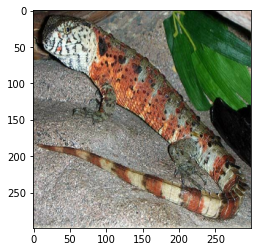

In [23]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/c2.jpg")

c - acc: 0.8198397159576416


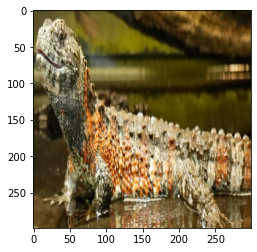

In [24]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/c3.jpg")

c - acc: 0.8566819429397583


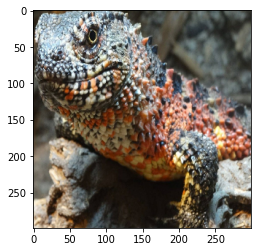

In [25]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/c4.jpg")

g - acc: 0.7796168327331543


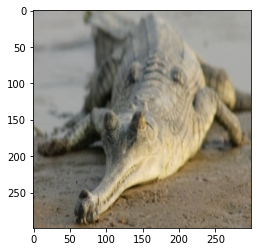

In [26]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/g1.jpg")

g - acc: 0.8111796379089355


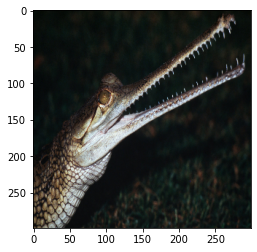

In [27]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/g3.jpg")

g - acc: 0.8464983701705933


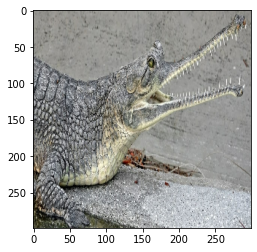

In [28]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/g4.jpg")

g - acc: 0.8038076162338257


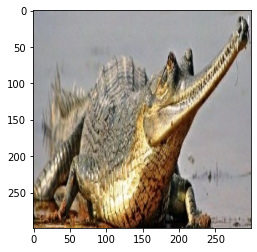

In [29]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/g5.jpg")

g - acc: 0.8199014663696289


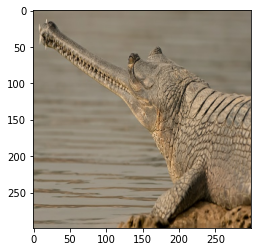

In [30]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/g6.jpg")

n - acc: 0.7635535597801208


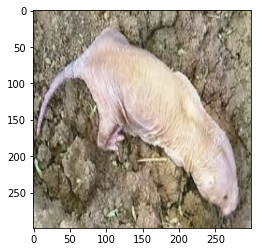

In [31]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/n (1).jpg")

n - acc: 0.9078363180160522


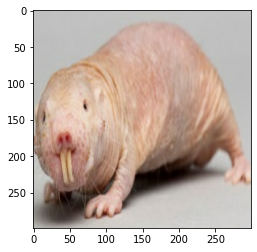

In [32]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/n (2).jpg")

n - acc: 0.7131503820419312


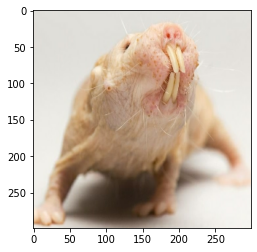

In [33]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/n (3).jpg")

n - acc: 0.7537109851837158


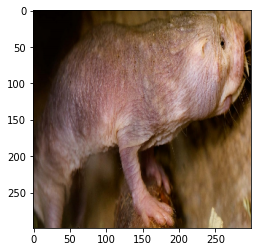

In [34]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/n (4).jpg")

n - acc: 0.7288031578063965


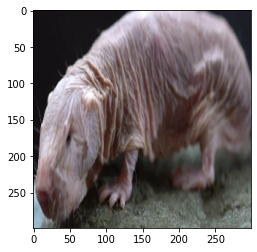

In [35]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/n (5).jpg")

n - acc: 0.8142305612564087


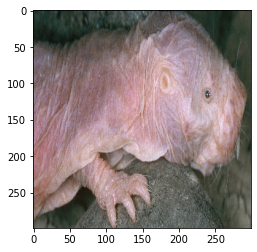

In [36]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/n (6).jpg")

p - acc: 0.7451088428497314


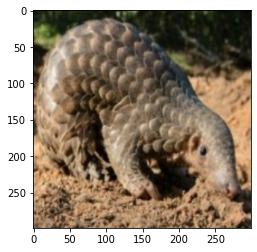

In [37]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/p (1).jpg")

p - acc: 0.8007740378379822


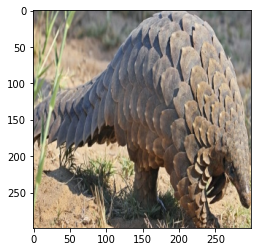

In [38]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/p (2).jpg")

p - acc: 0.7041898965835571


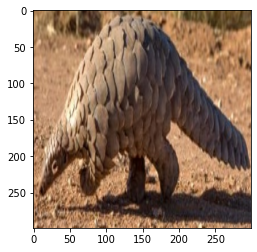

In [39]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/p (3).jpg")

p - acc: 0.7424372434616089


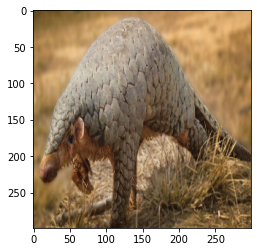

In [40]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/p (4).jpg")

p - acc: 0.6886125802993774


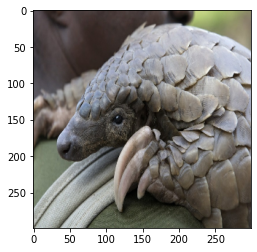

In [41]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/p (5).jpg")

p - acc: 0.7858856916427612


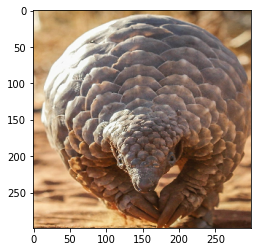

In [42]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/p (6).jpg")

unk - acc: 0.6485344171524048


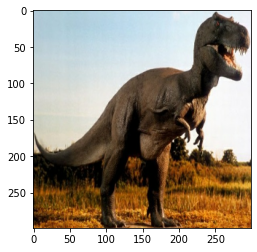

In [43]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/trash/tr1.jpg")

unk - acc: 0.5103086233139038


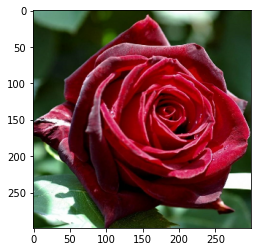

In [44]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/trash/tf1.jpg")

unk - acc: 0.4494209587574005


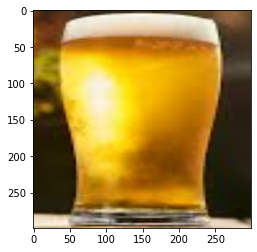

In [45]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/trash/beer2_t.jpeg")

unk - acc: 0.5494823455810547


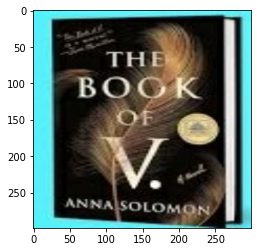

In [46]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/trash/bk2.jpg")

unk - acc: 0.5341747999191284


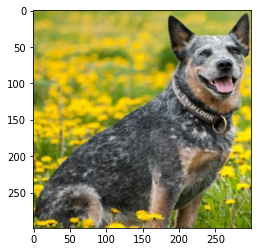

In [47]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/trash/c3.jpg")

unk - acc: 0.5129581689834595


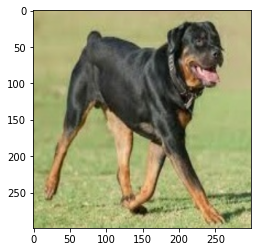

In [48]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/trash/c4.jpg")

unk - acc: 0.6055597066879272


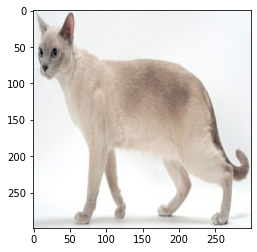

In [49]:
inference("/content/drive/My Drive/dl_replace_nn_output_cosine_sim/test/trash/p2.jpg")